# cycleGAN

In [1]:
from PIL import Image
from matplotlib.pyplot import imshow
from IPython.display import display # to display images
from multiprocessing import Process
import histogram as htg
import aHash as ah
import pHash as ph
import dHash as dh
from glob import glob

#opens images:
target = glob("./cycleGAN/B2A/gen/target/*.jpg") # target only one
compare_list = glob("./cycleGAN/B2A/gen/compare/*.png")
# print("find file: {}".format(target))

result_width, result_height = 560, 560
result_im = Image.new('RGB', (result_width, result_height))


# 依据图片直方图距离计算相似度
histogram_list = []

# 平均哈希算法计算相似度
aHash_list = []

# 感知哈希算法计算相似度
pHash_list = []

# 差异哈希算法计算相似度
dHash_list = []

# plt
data_h_list = []
data_a_list = []
data_p_list = []
data_d_list = []

# read image files
img_target = Image.open(target[0])
img1 = img_target
img1_htg = htg.regularizeImage(img1)
hg1 = img1_htg.histogram()

for idx, img_location in enumerate(compare_list):
    if idx % 10 == 0 :
        print("finish: [{}/{}]".format(idx, len(compare_list)))
    
#     if idx == 50 :
#         break
    
    img_compare = Image.open(img_location)
    
    
    img2 = img_compare

#     display(img1)
#     display(img2)


    #     print('img1_shape = {}'.format(img1.shape))
    #     print('img2_shape = {}'.format(img2.shape))

    # Histogram Similarity Calculation
    # regularize the images
    
    img2_htg = htg.regularizeImage(img2)

    
    #     print(hg1)
    # print(img1.histogram())
#     print('img1的样本点有{}个'.format(len(hg1)))
    hg2 = img2_htg.histogram()
    #     print(hg2)
    # print(img2.histogram())
#     print('img2的样本点有{}个'.format(len(hg2)))

    # draw the histogram in a no-blocking way
    sub_thread = Process(target=htg.drawHistogram, args=(hg1, hg2,))
    sub_thread.start()


    percentage = 64

    # print the histogram similarity
#     print('依据图片直方图距离计算相似度：{}'.format(htg.calMultipleHistogramSimilarity(img1_htg, img2_htg)))
    his_result = htg.calMultipleHistogramSimilarity(img1_htg, img2_htg)
    histogram_list.append(his_result)
    data_h_list.append((idx, his_result))
    
    # aHash Calculation
#     print('依据平均哈希算法计算相似度：{}/{}'.format(ah.calaHashSimilarity(img1, img2), percentage))
    ahash_result = ah.calaHashSimilarity(img1, img2)/64
    aHash_list.append(ahash_result)
    data_a_list.append((idx, ahash_result))
    
    # pHash Calculation
#     print('依据感知哈希算法计算相似度：{}/{}'.format(ph.calpHashSimilarity(img1, img2), percentage))
    phash_result = ph.calpHashSimilarity(img1, img2)/64
    pHash_list.append(phash_result)
    data_p_list.append((idx, phash_result))
    
    # dHash Calculation
#     print('依据差异哈希算法计算相似度：{}/{}'.format(dh.caldHashSimilarity(img1, img2), percentage))
    dhash_result = dh.caldHashSimilarity(img1, img2)/64
    dHash_list.append(dhash_result)
    data_d_list.append((idx, dhash_result))
    
    
    


finish: [0/300]
finish: [10/300]
finish: [20/300]
finish: [30/300]
finish: [40/300]
finish: [50/300]
finish: [60/300]
finish: [70/300]
finish: [80/300]
finish: [90/300]
finish: [100/300]
finish: [110/300]
finish: [120/300]
finish: [130/300]
finish: [140/300]
finish: [150/300]
finish: [160/300]
finish: [170/300]
finish: [180/300]
finish: [190/300]
finish: [200/300]
finish: [210/300]
finish: [220/300]
finish: [230/300]
finish: [240/300]
finish: [250/300]
finish: [260/300]
finish: [270/300]
finish: [280/300]
finish: [290/300]


In [2]:
# Importing the statistics module 
import statistics 
  
# # list of positive integer numbers 
# data1 = [1, 3, 4, 5, 7, 9, 2] 
  
# x = statistics.mean(data1) 

print("histogram_list mean is :", statistics.mean(histogram_list))
print("aHash_list mean is :", statistics.mean(aHash_list))
print("pHash_list mean is :", statistics.mean(pHash_list))
print("dHash_list mean is :", statistics.mean(dHash_list))
  
# Printing the mean 
# print("Mean is :", x) 

histogram_list mean is : 0.5480266028570916
aHash_list mean is : 0.8086979166666667
pHash_list mean is : 1.0
dHash_list mean is : 0.8375520833333333


In [3]:
import matplotlib.pyplot as plt

def plotData(plt, data):
    x = [p[0] for p in data]
    y = [p[1] for p in data]
    plt.plot(x, y, '-o')

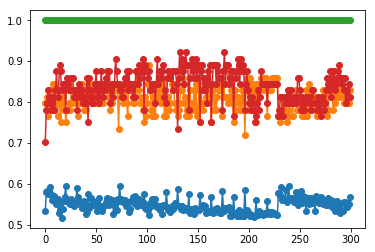

In [4]:
plotData(plt, data_h_list)
plotData(plt, data_a_list)
plotData(plt, data_p_list)
plotData(plt, data_d_list)
# plt.legend()
plt.show()

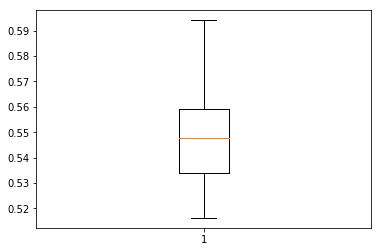

In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# normal_samples = np.random.normal(size = 100) # 生成 100000 組標準常態分配（平均值為 0，標準差為 1 的常態分配）隨機變數

# print(histogram_list)

plt.boxplot(histogram_list)
plt.boxplot(histogram_list)
plt.boxplot(histogram_list)
plt.boxplot(histogram_list)
plt.show()


# CycleCoopNet

In [6]:
#opens images:
target = glob("./cyclecoopnet/B2A/gen/target/*.jpg") # target only one
compare_list = glob("./cyclecoopnet/B2A/gen/compare/*.png")
# print("find file: {}".format(target))

result_width, result_height = 560, 560
result_im = Image.new('RGB', (result_width, result_height))


# 依据图片直方图距离计算相似度
coopnet_histogram_list = []

# 平均哈希算法计算相似度
coopnet_aHash_list = []

# 感知哈希算法计算相似度
coopnet_pHash_list = []

# 差异哈希算法计算相似度
coopnet_dHash_list = []

# plt
coopnet_data_h_list = []
coopnet_data_a_list = []
coopnet_data_p_list = []
coopnet_data_d_list = []

# read image files
img_target = Image.open(target[0])
img1 = img_target
img1_htg = htg.regularizeImage(img1)
hg1 = img1_htg.histogram()

for idx, img_location in enumerate(compare_list):
    if idx % 10 == 0 :
        print("finish: [{}/{}]".format(idx, len(compare_list)))
    
#     if idx == 50 :
#         break
    
    img_compare = Image.open(img_location)
    
    
    img2 = img_compare

#     display(img1)
#     display(img2)


    #     print('img1_shape = {}'.format(img1.shape))
    #     print('img2_shape = {}'.format(img2.shape))

    # Histogram Similarity Calculation
    # regularize the images
    
    img2_htg = htg.regularizeImage(img2)

    
    #     print(hg1)
    # print(img1.histogram())
#     print('img1的样本点有{}个'.format(len(hg1)))
    hg2 = img2_htg.histogram()
    #     print(hg2)
    # print(img2.histogram())
#     print('img2的样本点有{}个'.format(len(hg2)))

    # draw the histogram in a no-blocking way
    sub_thread = Process(target=htg.drawHistogram, args=(hg1, hg2,))
    sub_thread.start()


    percentage = 64

    # print the histogram similarity
#     print('依据图片直方图距离计算相似度：{}'.format(htg.calMultipleHistogramSimilarity(img1_htg, img2_htg)))
    his_result = htg.calMultipleHistogramSimilarity(img1_htg, img2_htg)
    coopnet_histogram_list.append(his_result)
    coopnet_data_h_list.append((idx, his_result))
    
    # aHash Calculation
#     print('依据平均哈希算法计算相似度：{}/{}'.format(ah.calaHashSimilarity(img1, img2), percentage))
    ahash_result = ah.calaHashSimilarity(img1, img2)/64
    coopnet_aHash_list.append(ahash_result)
    coopnet_data_a_list.append((idx, ahash_result))
    
    # pHash Calculation
#     print('依据感知哈希算法计算相似度：{}/{}'.format(ph.calpHashSimilarity(img1, img2), percentage))
    phash_result = ph.calpHashSimilarity(img1, img2)/64
    coopnet_pHash_list.append(phash_result)
    coopnet_data_p_list.append((idx, phash_result))
    
    # dHash Calculation
#     print('依据差异哈希算法计算相似度：{}/{}'.format(dh.caldHashSimilarity(img1, img2), percentage))
    dhash_result = dh.caldHashSimilarity(img1, img2)/64
    coopnet_dHash_list.append(dhash_result)
    coopnet_data_d_list.append((idx, dhash_result))
    
    
    


finish: [0/300]
finish: [10/300]
finish: [20/300]
finish: [30/300]
finish: [40/300]
finish: [50/300]
finish: [60/300]
finish: [70/300]
finish: [80/300]
finish: [90/300]
finish: [100/300]
finish: [110/300]
finish: [120/300]
finish: [130/300]
finish: [140/300]
finish: [150/300]
finish: [160/300]
finish: [170/300]
finish: [180/300]
finish: [190/300]
finish: [200/300]
finish: [210/300]
finish: [220/300]
finish: [230/300]
finish: [240/300]
finish: [250/300]
finish: [260/300]
finish: [270/300]
finish: [280/300]
finish: [290/300]


# result: draw box

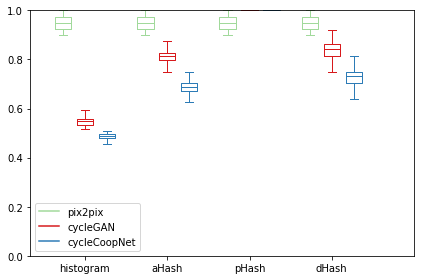

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# data_a = [[1,2,5], [5,7,2,2,5], [7,2,5]]

data_c = [[1,0.9],[1,0.9],[1,0.9],[1,0.9]]
data_a = [histogram_list, aHash_list, pHash_list, dHash_list]
# data_b = [[0.6,0.4,0.2], [0.1,0.2,0.5,0.3,0.2], [0.2,0.3,0.5,0.1], [0.2,0.3,0.5,0.1]]
data_b = [coopnet_histogram_list, coopnet_aHash_list, coopnet_pHash_list, coopnet_dHash_list]

# ticks = ['case A', 'case B', 'case C']
ticks = ['histogram', 'aHash', 'pHash', 'dHash']


def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure()


bpll = plt.boxplot(data_c, positions=np.array(range(len(data_c)))*3.0-0.8, sym='', widths=0.6)
bpl = plt.boxplot(data_a, positions=np.array(range(len(data_a)))*3.0-0, sym='', widths=0.6)
bpr = plt.boxplot(data_b, positions=np.array(range(len(data_b)))*3.0+0.8, sym='', widths=0.6)
set_box_color(bpll, '#a1d99b')
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#a1d99b', label='pix2pix')
plt.plot([], c='#D7191C', label='cycleGAN')
plt.plot([], c='#2C7BB6', label='cycleCoopNet')
plt.legend()

plt.xticks(range(0, len(ticks) * 3, 3), ticks)
plt.xlim(-2, len(ticks)*3)
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig('boxcompare.png')
plt.show()

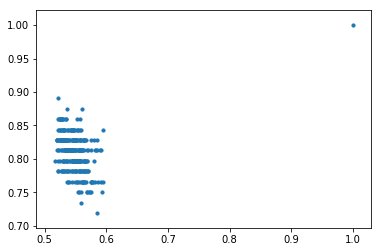

In [45]:
# #設定x軸範圍
# plt.xlim(0,1)
# #設定y軸範圍
# plt.ylim(0,1)

plt.scatter(histogram_list+[1], aHash_list+[1], s=10)
plt.show()

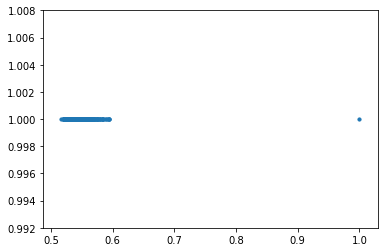

In [46]:
plt.scatter(histogram_list+[1], pHash_list+[1], s=10)
plt.show()

In [11]:
print(pHash_list)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,

In [12]:
print(coopnet_pHash_list)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,